In [1]:
%%time
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from imblearn.over_sampling import SMOTE,RandomOverSampler
df = pd.read_csv("60s_window_wrist_chest.csv",index_col=0)
column=df.columns.tolist()
print(len(column))
#column = ['EDA_tonic_mean','EDA_smna_mean','EDA_tonic_min','EDA_phasic_mean','TEMP_std','BVP_peak_freq','smoker_YES','ACC_y_min','ACC_x_mean','weight','gender_ female','c_Temp_max','ACC_x_max','TEMP_mean','c_ACC_y_std','net_acc_max','Resp_std','subject','label']
column

Using TensorFlow backend.
/home/sf/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sf/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sf/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sf/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtype

72
CPU times: user 3.12 s, sys: 932 ms, total: 4.05 s
Wall time: 24.9 s


['net_acc_mean',
 'net_acc_std',
 'net_acc_min',
 'net_acc_max',
 'ACC_x_mean',
 'ACC_x_std',
 'ACC_x_min',
 'ACC_x_max',
 'ACC_y_mean',
 'ACC_y_std',
 'ACC_y_min',
 'ACC_y_max',
 'ACC_z_mean',
 'ACC_z_std',
 'ACC_z_min',
 'ACC_z_max',
 'BVP_mean',
 'BVP_std',
 'BVP_min',
 'BVP_max',
 'ECG_mean',
 'ECG_std',
 'ECG_min',
 'ECG_max',
 'EDA_mean',
 'EDA_std',
 'EDA_min',
 'EDA_max',
 'EDA_phasic_mean',
 'EDA_phasic_std',
 'EDA_phasic_min',
 'EDA_phasic_max',
 'EDA_smna_mean',
 'EDA_smna_std',
 'EDA_smna_min',
 'EDA_smna_max',
 'EDA_tonic_mean',
 'EDA_tonic_std',
 'EDA_tonic_min',
 'EDA_tonic_max',
 'EMG_mean',
 'EMG_std',
 'EMG_min',
 'EMG_max',
 'Resp_mean',
 'Resp_std',
 'Resp_min',
 'Resp_max',
 'TEMP_mean',
 'TEMP_std',
 'TEMP_min',
 'TEMP_max',
 'c_ACC_x_mean',
 'c_ACC_x_std',
 'c_ACC_x_min',
 'c_ACC_x_max',
 'c_ACC_y_mean',
 'c_ACC_y_std',
 'c_ACC_y_min',
 'c_ACC_y_max',
 'c_ACC_z_mean',
 'c_ACC_z_std',
 'c_ACC_z_min',
 'c_ACC_z_max',
 'c_Temp_mean',
 'c_Temp_std',
 'c_Temp_min',
 '

In [13]:
features=df.columns.tolist()
features

removed = ['label']
for rem in removed:
    features.remove(rem)

features_with_sub=[]
features_with_sub[:]=features
removed = ['subject']
for rem in removed:
    features.remove(rem)

feature=features
print(len(feature))
len(features_with_sub)

sm = SMOTE(random_state=2)
X, y= sm.fit_sample(df[features_with_sub], df['label'])
df_new=pd.concat([pd.DataFrame(X,columns=features_with_sub),pd.DataFrame(y,columns=['label'])],axis=1)
df_new

for i in range (len(list(df_new['subject']))):
    df_new['subject'][i] = min([2,3,4,5,6,7,8,9,10,11,13,14,15,16,17], key=lambda x:abs(x-df_new['subject'][i]))
df_new['subject']=df_new['subject'].astype(int)

p_d=pd.read_csv('personal_detail.csv',index_col=0)

df_new_1=df_new.merge(p_d,on='subject')

df=df_new
df=df_new_1

70


/home/sf/.local/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [28]:
#column = ['EDA_tonic_mean','EDA_smna_mean','EDA_tonic_min','EDA_phasic_mean','TEMP_std','BVP_peak_freq','ACC_y_min','ACC_x_mean','c_Temp_max','ACC_x_max','TEMP_mean','c_ACC_y_std','net_acc_max','Resp_std','subject','label']
df
list(df)

['net_acc_mean',
 'net_acc_std',
 'net_acc_min',
 'net_acc_max',
 'ACC_x_mean',
 'ACC_x_std',
 'ACC_x_min',
 'ACC_x_max',
 'ACC_y_mean',
 'ACC_y_std',
 'ACC_y_min',
 'ACC_y_max',
 'ACC_z_mean',
 'ACC_z_std',
 'ACC_z_min',
 'ACC_z_max',
 'BVP_mean',
 'BVP_std',
 'BVP_min',
 'BVP_max',
 'ECG_mean',
 'ECG_std',
 'ECG_min',
 'ECG_max',
 'EDA_mean',
 'EDA_std',
 'EDA_min',
 'EDA_max',
 'EDA_phasic_mean',
 'EDA_phasic_std',
 'EDA_phasic_min',
 'EDA_phasic_max',
 'EDA_smna_mean',
 'EDA_smna_std',
 'EDA_smna_min',
 'EDA_smna_max',
 'EDA_tonic_mean',
 'EDA_tonic_std',
 'EDA_tonic_min',
 'EDA_tonic_max',
 'EMG_mean',
 'EMG_std',
 'EMG_min',
 'EMG_max',
 'Resp_mean',
 'Resp_std',
 'Resp_min',
 'Resp_max',
 'TEMP_mean',
 'TEMP_std',
 'TEMP_min',
 'TEMP_max',
 'c_ACC_x_mean',
 'c_ACC_x_std',
 'c_ACC_x_min',
 'c_ACC_x_max',
 'c_ACC_y_mean',
 'c_ACC_y_std',
 'c_ACC_y_min',
 'c_ACC_y_max',
 'c_ACC_z_mean',
 'c_ACC_z_std',
 'c_ACC_z_min',
 'c_ACC_z_max',
 'c_Temp_mean',
 'c_Temp_std',
 'c_Temp_min',
 '

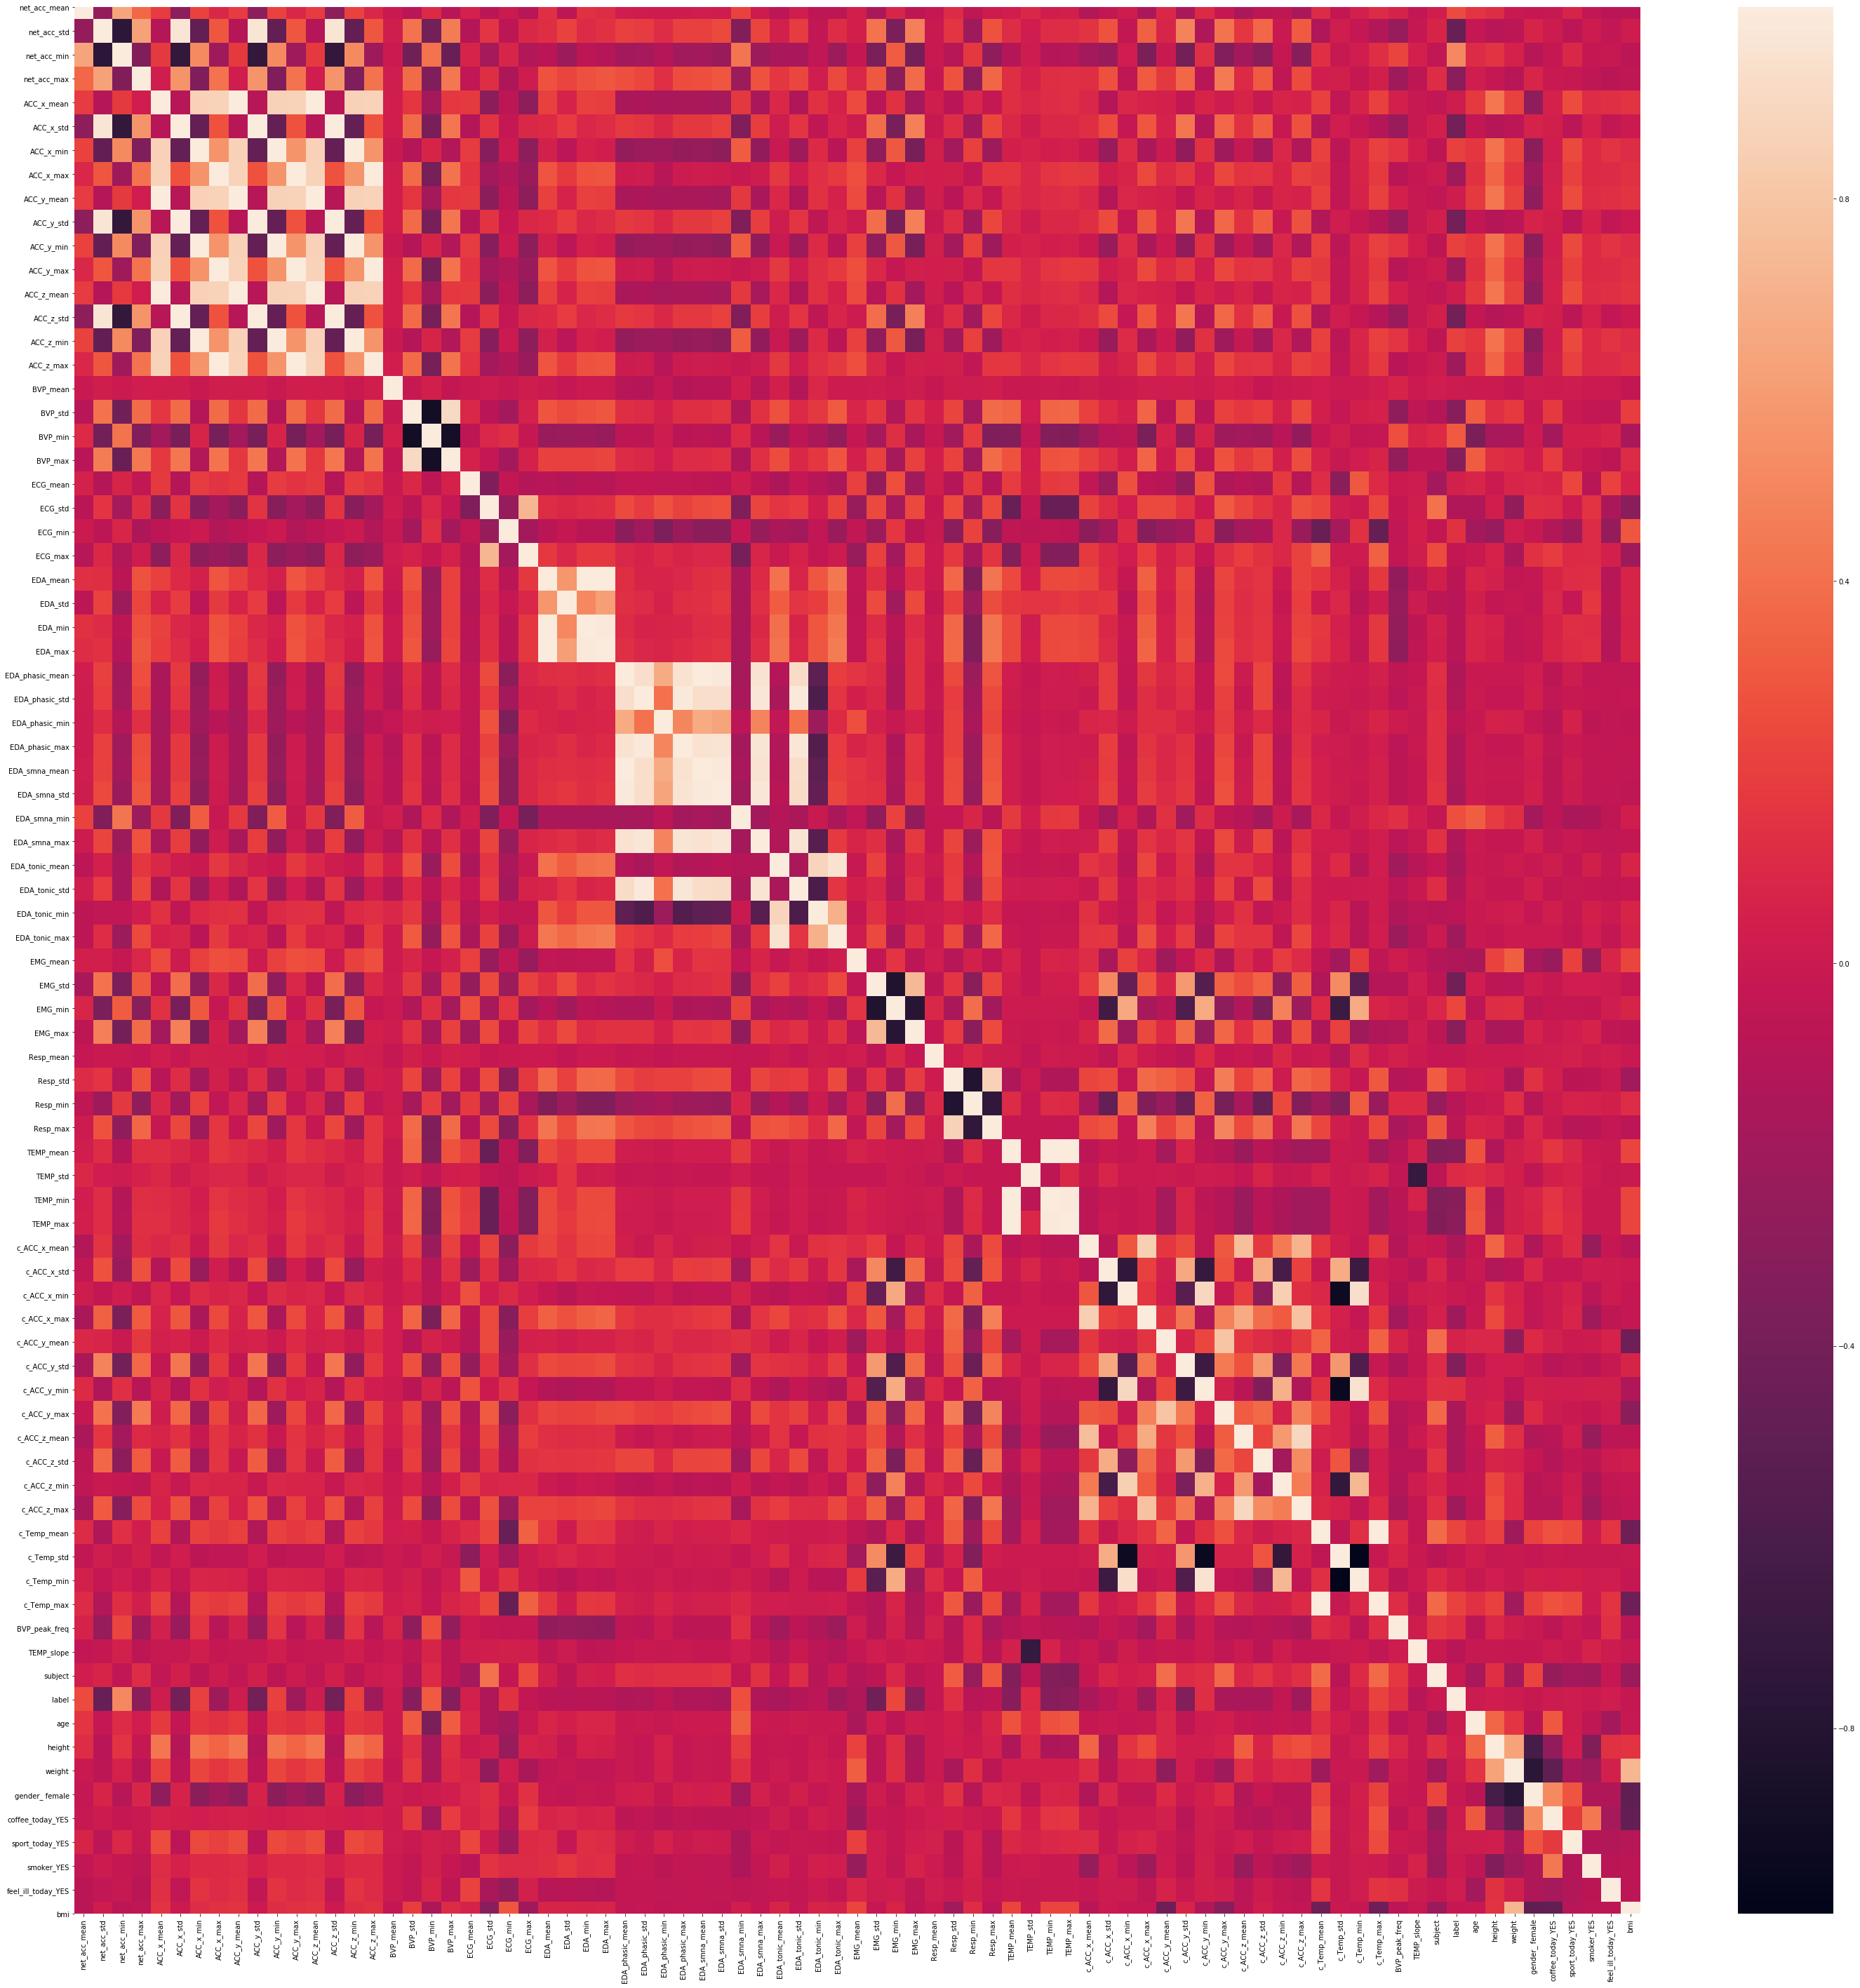

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df.corr()
plt.figure(figsize=(50,50))
sns.heatmap(corr);

In [57]:
# sns.heatmap(corr[['label']], annot=True)
cor_dict = dict(corr['label'])

sort_cor_dict = sorted(cor_dict.items(), key = lambda x : x[1])
selected_features = ['EDA_tonic_mean','EDA_smna_mean','EDA_tonic_min','EDA_phasic_mean','TEMP_std','BVP_peak_freq','smoker_YES','ACC_y_min','ACC_x_mean','weight','gender_ female','c_Temp_max','ACC_x_max','TEMP_mean',
          'c_ACC_y_std','net_acc_max','Resp_std']

print (sort_cor_dict[-15:])

temp = []
for i in sort_cor_dict[-15:]:
    temp.append(i[0])
    
print (temp)
# for s in sort_cor_dict:
#     if s[0] in selected_features:
#         print (s)

[('c_ACC_y_min', 0.12589813889974025), ('BVP_peak_freq', 0.12829119500504832), ('Resp_std', 0.13242351355560741), ('ECG_min', 0.13914568293094717), ('ACC_x_min', 0.20083383960693488), ('ACC_y_min', 0.20083383960693513), ('ACC_z_min', 0.20083383960693513), ('c_Temp_max', 0.21677761531707246), ('c_Temp_mean', 0.22319112960756607), ('EMG_min', 0.2299743086374034), ('net_acc_mean', 0.2520679327899131), ('EDA_smna_min', 0.2663557729484673), ('BVP_min', 0.307561307185705), ('net_acc_min', 0.5050391251742604), ('label', 1.0)]
['c_ACC_y_min', 'BVP_peak_freq', 'Resp_std', 'ECG_min', 'ACC_x_min', 'ACC_y_min', 'ACC_z_min', 'c_Temp_max', 'c_Temp_mean', 'EMG_min', 'net_acc_mean', 'EDA_smna_min', 'BVP_min', 'net_acc_min', 'label']


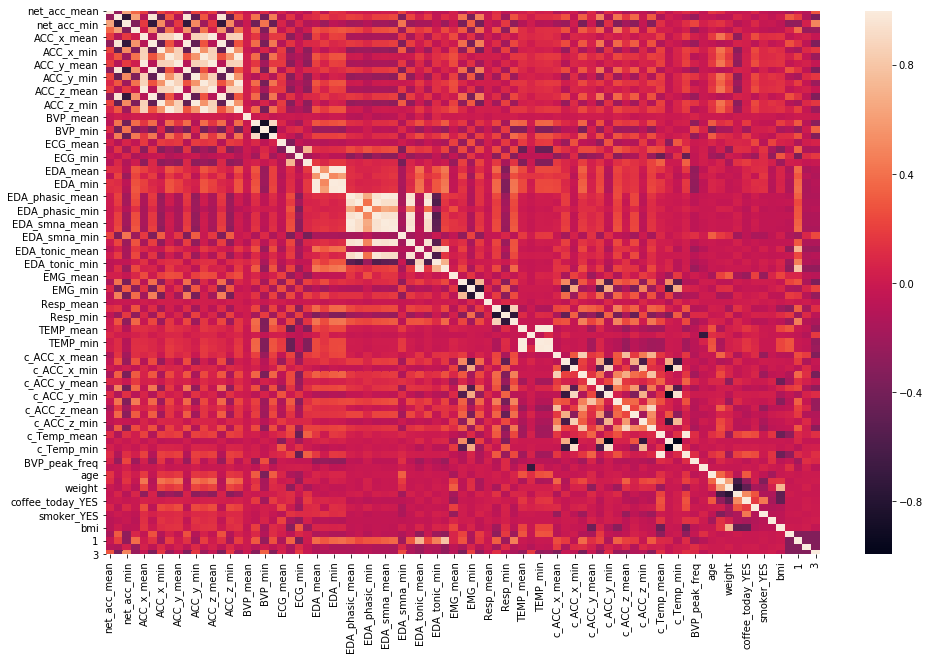

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

cdf = pd.concat([df.drop(['label','subject'], axis=1), pd.get_dummies(df['label'])], axis=1)
corr = cdf.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr);

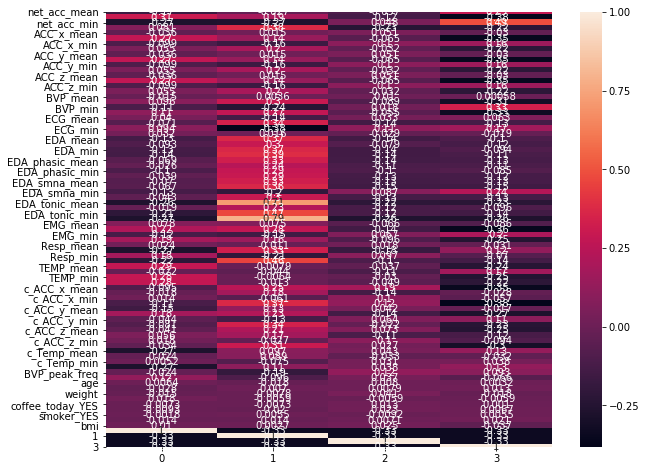

In [15]:
corr = cdf.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr[[0,1,2,3]], annot=True);

In [9]:
cdf

,net_acc_mean,net_acc_std,net_acc_min,net_acc_max,ACC_x_mean,ACC_x_std,ACC_x_min,ACC_x_max,ACC_y_mean,ACC_y_std,...,c_Temp_mean,c_Temp_std,c_Temp_min,c_Temp_max,BVP_peak_freq,TEMP_slope,0,1,2,3
0,0.025961,0.013811,0.000000,0.087383,0.023431,0.017769,-0.037843,0.087383,0.000016,1.222594e-05,...,29.168923,0.064290,28.994568,29.426208,0.081425,-0.000253,1,0,0,0
1,0.027640,0.010597,0.002752,0.054356,0.027640,0.010597,0.002752,0.054356,0.000019,7.290999e-06,...,28.886605,0.074846,28.730682,29.207275,0.147017,-0.000161,1,0,0,0
2,0.028389,0.006937,0.000000,0.066053,0.028378,0.006985,-0.002752,0.066053,0.000020,4.805734e-06,...,28.799659,0.037924,28.679108,28.988800,0.088210,0.000535,1,0,0,0
3,0.033268,0.007670,0.000000,0.074998,0.032960,0.008904,-0.030962,0.074998,0.000023,6.126303e-06,...,28.768865,0.058639,28.584656,29.023285,0.117614,-0.000256,1,0,0,0
4,0.037021,0.001284,0.027522,0.043347,0.037021,0.001284,0.027522,0.043347,0.000025,8.837530e-07,...,28.598514,0.068128,28.447449,28.882599,0.151541,0.000260,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243,0.042130,0.000328,0.040968,0.043696,-0.039802,0.000328,-0.041346,-0.038618,-0.000027,2.254555e-07,...,34.905210,0.030299,34.784758,35.042778,0.164873,-0.000189,0,0,0,1
1244,0.039764,0.000271,0.039219,0.039907,0.039764,0.000271,0.039219,0.039907,0.000027,1.862190e-07,...,34.292072,0.026637,34.169402,34.434019,0.131407,-0.000133,0,0,0,1
1245,0.041990,0.000231,0.039308,0.043921,0.003807,0.000231,0.001499,0.006112,0.000003,1.590967e-07,...,33.758163,0.023225,33.601703,33.916210,0.142617,-0.000093,0,0,0,1
1246,0.040894,0.000132,0.040569,0.041733,0.040894,0.000132,0.040569,0.041733,0.000028,9.076908e-08,...,34.653072,0.034816,34.524100,34.800521,0.137624,0.000187,0,0,0,1


In [6]:

corrmat = cdf.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

NameError: name 'data' is not defined

<Figure size 1440x1440 with 0 Axes>

In [18]:
corr = df.corr()
corr['label']
sns.heatmap(corr['label'])

IndexError: Inconsistent shape between the condition and the input (got (81, 1) and (81,))

In [3]:
%%time
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 3
plt.rcParams["figure.figsize"] = fig_size
print ("Current size:", fig_size)

Current size: [12, 3]
CPU times: user 614 µs, sys: 101 µs, total: 715 µs
Wall time: 383 µs


In [4]:

%%time
subjects=list(df['subject'].unique())
subjects.sort()
subjects

CPU times: user 527 µs, sys: 87 µs, total: 614 µs
Wall time: 582 µs


[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17]

In [5]:
%%time
mas_df=[]
for i in subjects:
    print(i)
    new_df=df[df['subject']==i][column]
    new_df=new_df.corr()
    new_df=new_df['label']
    new_df=new_df.abs()*100
    new_df=new_df[:-2]
    print(len(new_df))
    if(i==2):
        mas_df=[list(new_df)]
        print(mas_df)
    else:
        mas_df.append(list(new_df))
        #print(mas_df)
    #plt.bar(list(new_df.index)[1:], list(new_df.values)[1:])
    

2
70
[[36.89839021319545, 58.680592138239916, 71.33768006892663, 21.237149512332536, 35.622106918012626, 57.163887094630425, 64.77503860629508, 21.214769463913456, 35.6221069180105, 57.16388709463066, 64.77503860629508, 21.214769463913445, 35.6221069180105, 57.16388709463066, 64.77503860629508, 21.214769463913445, 0.3644142849299743, 39.97647172118649, 40.312341923974884, 54.39007552577433, 3.116330797742284, 53.94958544398776, 19.960840021743824, 22.627675727538005, 23.7414037855226, 25.79137888782814, 22.66839751625536, 25.03109820632059, 20.661712208385357, 20.255120539675513, 17.187315413448225, 18.655045046750917, 21.510182993234586, 24.442170135031574, 55.11822794831554, 25.21425286634148, 21.84099674612642, 22.985551858995326, 17.985465515882893, 25.351689207743807, 60.86793382021434, 65.29770734795491, 29.425806226673064, 34.334451193112876, 1.306615539309383, 18.652690462231917, 2.158833507528625, 9.10389733137795, 57.27394660151086, 25.592053152259002, 57.35057031091506, 55.6

In [6]:
print(len(mas_df[0]))

70


In [7]:
for i in mas_df:
    print(i)
    print(len(i))
    break

[36.89839021319545, 58.680592138239916, 71.33768006892663, 21.237149512332536, 35.622106918012626, 57.163887094630425, 64.77503860629508, 21.214769463913456, 35.6221069180105, 57.16388709463066, 64.77503860629508, 21.214769463913445, 35.6221069180105, 57.16388709463066, 64.77503860629508, 21.214769463913445, 0.3644142849299743, 39.97647172118649, 40.312341923974884, 54.39007552577433, 3.116330797742284, 53.94958544398776, 19.960840021743824, 22.627675727538005, 23.7414037855226, 25.79137888782814, 22.66839751625536, 25.03109820632059, 20.661712208385357, 20.255120539675513, 17.187315413448225, 18.655045046750917, 21.510182993234586, 24.442170135031574, 55.11822794831554, 25.21425286634148, 21.84099674612642, 22.985551858995326, 17.985465515882893, 25.351689207743807, 60.86793382021434, 65.29770734795491, 29.425806226673064, 34.334451193112876, 1.306615539309383, 18.652690462231917, 2.158833507528625, 9.10389733137795, 57.27394660151086, 25.592053152259002, 57.35057031091506, 55.6188218

In [8]:
bb=pd.DataFrame(data=mas_df,columns=column[:-2],index=[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17])

In [9]:
bb.describe().sort_values('mean',1,ascending=False)

,EMG_std,net_acc_min,c_ACC_y_max,net_acc_std,TEMP_min,TEMP_mean,TEMP_max,ACC_y_std,ACC_x_std,ACC_z_std,...,EDA_min,c_ACC_x_std,TEMP_slope,EDA_phasic_min,TEMP_std,ECG_max,c_Temp_std,ECG_mean,Resp_mean,BVP_mean
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,...,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,52.644831,50.815496,46.175176,45.604508,43.946828,43.835085,42.274236,41.264541,41.264541,41.264541,...,18.302012,15.059816,14.641878,13.284343,12.575733,11.866385,11.630583,9.432348,5.938765,3.871144
std,17.242326,22.696886,18.634001,19.377191,26.699801,26.775380,26.995063,20.908357,20.908357,20.908357,...,20.220375,12.085835,12.726740,5.529441,8.064118,6.888405,9.281377,7.423063,5.694383,2.865096
min,23.571869,2.262170,5.331237,11.826213,0.622538,0.256163,0.220790,2.797759,2.797759,2.797759,...,0.875196,3.722276,0.715890,0.408371,2.609038,3.643475,1.967863,0.113408,0.239820,0.051041
25%,45.024509,33.319248,39.210681,29.389090,23.172214,22.471902,19.213974,22.568391,22.568391,22.568391,...,3.382784,6.095628,4.085755,11.716002,6.550631,6.257002,4.653526,3.011914,1.381816,2.112968
50%,51.896567,56.308558,48.726240,56.169562,54.062117,54.130953,49.394267,47.268080,47.268080,47.268080,...,10.018242,10.449114,12.132533,13.901777,11.899012,10.338792,7.624027,9.287881,3.036832,3.515190
75%,65.271232,70.927529,58.603676,62.606887,56.726289,57.105539,56.878752,57.566541,57.566541,57.566541,...,23.604457,18.540096,22.946779,15.848711,16.582013,17.780315,17.822401,13.738582,8.842364,4.867654
max,75.390265,75.478881,75.445525,68.276246,80.933987,80.934871,80.844466,67.543797,67.543797,67.543797,...,70.457491,41.141309,45.328658,23.678081,28.491522,23.985606,29.763743,23.004656,17.526960,10.620558


In [10]:
import seaborn as sns

cm = sns.light_palette("green", as_cmap=True)

bb.style.background_gradient(cmap=cm,axis=1)
